# **Import Data**

In [57]:
import numpy as np
tissuemnist = np.load('/content/drive/MyDrive/tissuemnist.npz')

In [58]:
tissuemnist.files

['train_images',
 'train_labels',
 'val_images',
 'val_labels',
 'test_images',
 'test_labels']

In [59]:
x_train = tissuemnist['train_images']
x_val = tissuemnist['val_images']
x_test = tissuemnist['test_images']
y_train = tissuemnist['train_labels']
y_val = tissuemnist['val_labels']
y_test = tissuemnist['test_labels']

In [ ]:
x_train.shape


(165466, 28, 28)

In [ ]:
len(y_train)

165466

In [ ]:
y_train

array([[0],
       [0],
       [6],
       ...,
       [2],
       [1],
       [6]], dtype=uint8)

In [ ]:
x_test.shape

(47280, 28, 28)

In [ ]:
len(y_test)

47280

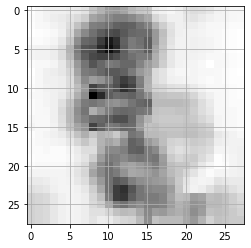

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[1],  cmap='Greys')
plt.grid(which='major')
plt.show()

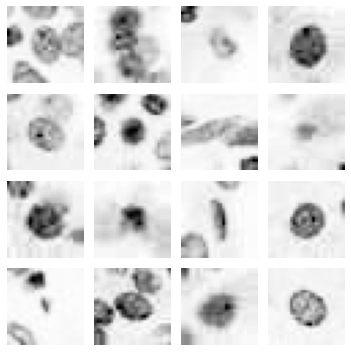

In [ ]:
plt.figure(figsize=(5,5))
for k in range(16):
 plt.subplot(4,4,k+1)
 plt.imshow(x_train[k], cmap='Greys')
 plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
y_train[0]

array([0], dtype=uint8)

Reshape

In [60]:
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples, nx*ny))
nsamples, nx, ny = x_val.shape
x_val = x_val.reshape((nsamples ,nx*ny))
nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples, nx*ny))

In [ ]:
x_train.shape

(165466, 784)

In [ ]:
x_test.shape

(47280, 784)

Normalization

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [ ]:
x_train.shape

(165466, 784)

# **CNN**

In [62]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

In [63]:
n_classes = 8
y_train = keras.utils.to_categorical(y_train,n_classes)
y_val = keras.utils.to_categorical(y_val,n_classes)
y_test = keras.utils.to_categorical(y_test,n_classes)
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
twoLayerDensemodel = Sequential()
#====================== hidden layer one
twoLayerDensemodel.add(Dense(64, activation = 'relu',input_shape =(784,)))
#====================== hidden layer two
twoLayerDensemodel.add(Dense(64, activation = 'relu'))
##================================ Output layer
twoLayerDensemodel.add(Dense(8, activation = 'softmax'))
#### =======================================
### let us see a summary of network
twoLayerDensemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
Total params: 54,920
Trainable params: 54,920
Non-trainable params: 0
_________________________________________________________________


In [ ]:
twoLayerDensemodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
twoLayerDensemodel.fit(x_train, y_train, batch_size = 128, epochs = 25,
 verbose =1, validation_data=(x_val, y_val))

In [ ]:
twoLayerDensemodel.evaluate(x_test, y_test)

# **Reshape**

In [64]:
x_train.shape[0]

165466

In [65]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [66]:
x_train = x_train.reshape(x_train.shape[0],28,28)
x_val = x_val.reshape(x_val.shape[0],28,28)
x_test = x_test.reshape(x_test.shape[0],28,28)

# **AlexNet**

In [44]:
alexnet = Sequential()

# Layer 1
alexnet.add(Conv2D(32,
          kernel_size=(5, 5),
          padding='same', 
          input_shape = (28,28,1), 
          activation='relu',
          strides=2))
alexnet.add(MaxPooling2D(pool_size=(3, 3), 
             strides=2))

# Layer 2
alexnet.add(Conv2D(64,
          kernel_size=(5, 5),
          padding='same',
          activation='relu',
          strides=1))
alexnet.add(MaxPooling2D(pool_size=(2, 2),
             strides=1))
# Layer 3
alexnet.add(Conv2D(128,
          kernel_size=(3, 3),
          padding='same', 
          activation='relu',
          strides=1))
alexnet.add(Conv2D(128,
          kernel_size=(3, 3),
          padding='same', 
          activation='relu',
          strides=1))
alexnet.add(Conv2D(128,
          kernel_size=(3, 3),
          padding='same', 
          activation='relu',
          strides=1))
alexnet.add(MaxPooling2D(pool_size=(2, 2), 
             strides=1))

# Layer 4
alexnet.add(Flatten())
alexnet.add(Dense(512, activation='relu'))
alexnet.add(Dropout(0.5))

# Layer 5
alexnet.add(Dense(8, activation='softmax'))

In [45]:
alexnet.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 14, 14, 32)        832       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 6, 6, 64)          51264     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 5, 5, 128)         73856     
                                                                 
 conv2d_38 (Conv2D)          (None, 5, 5, 128)        

In [46]:
alexnet.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
alexnet.fit(x_train, y_train, batch_size = 128, epochs = 25, verbose =1, validation_data=(x_val, y_val))

Epoch 1/25
1293/1293 [==============================] - 12s 8ms/step - loss: 1.2995 - accuracy: 0.5143 - val_loss: 1.1791 - val_accuracy: 0.5591
Epoch 2/25
1293/1293 [==============================] - 10s 8ms/step - loss: 1.1690 - accuracy: 0.5705 - val_loss: 1.1830 - val_accuracy: 0.5718
Epoch 3/25
1293/1293 [==============================] - 10s 8ms/step - loss: 1.1133 - accuracy: 0.5925 - val_loss: 1.0874 - val_accuracy: 0.5976
Epoch 4/25
1293/1293 [==============================] - 10s 8ms/step - loss: 1.0770 - accuracy: 0.6076 - val_loss: 1.0540 - val_accuracy: 0.6164
Epoch 5/25
1293/1293 [==============================] - 10s 8ms/step - loss: 1.0463 - accuracy: 0.6175 - val_loss: 1.0484 - val_accuracy: 0.6151
Epoch 6/25
1293/1293 [==============================] - 10s 8ms/step - loss: 1.0226 - accuracy: 0.6268 - val_loss: 1.0466 - val_accuracy: 0.6173
Epoch 7/25
1293/1293 [==============================] - 10s 8ms/step - loss: 0.9974 - accuracy: 0.6361 - val_loss: 1.0511 - val_ac

In [48]:
import keras
print(alexnet.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


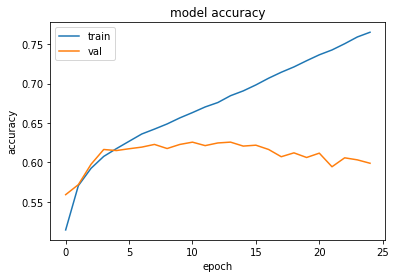

In [49]:
# model accuracy
plt.plot(alexnet.history.history['accuracy'])
plt.plot(alexnet.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'],loc = 'upper left')
plt.show()

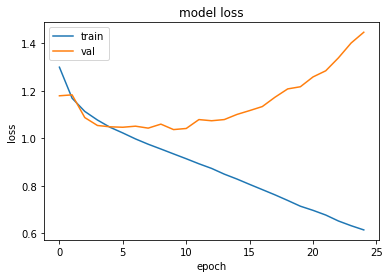

In [50]:
# model loss
plt.plot(alexnet.history.history['loss'])
plt.plot(alexnet.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'],loc = 'upper left')
plt.show()

In [51]:
alexnet.evaluate(x_test, y_test)

1478/1478 [==============================] - 5s 3ms/step - loss: 1.4432 - accuracy: 0.5991


[1.443199634552002, 0.5990905165672302]

# **VGGNet**

In [77]:
VGGNet = Sequential()
# 1
VGGNet.add(Conv2D(filters=64,
         kernel_size=(7, 7),
         strides=1,
         padding='same',
         activation='relu',
         input_shape=(28,28,1)))
VGGNet.add(Conv2D(filters=64,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(MaxPooling2D(pool_size=(2, 2),
          strides=2,
          padding='same'))

# 2
VGGNet.add(Conv2D(filters=128,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(Conv2D(filters=128,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(MaxPooling2D(pool_size=(2, 2),
            strides=2,
            padding='same'))

# 3
VGGNet.add(Conv2D(filters=256,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(Conv2D(filters=256,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(Conv2D(filters=256,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(Conv2D(filters=256,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(MaxPooling2D(pool_size=(2, 2),
            strides=2,
            padding='same'))

# 4
VGGNet.add(Conv2D(filters=512,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(Conv2D(filters=512,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(Conv2D(filters=512,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(Conv2D(filters=512,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(MaxPooling2D(pool_size=(2, 2),
            strides=2,
            padding='same'))

# 5
VGGNet.add(Conv2D(filters=512,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(Conv2D(filters=512,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(Conv2D(filters=512,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(Conv2D(filters=512,
         kernel_size=(3, 3),
         strides=1,
         padding='same',
         activation='relu'))
VGGNet.add(MaxPooling2D(pool_size=(2, 2),
            strides=2,
            padding='same'))

VGGNet.add(Flatten())
VGGNet.add(Dense(units=4096, activation='relu'))
VGGNet.add(Dense(units=4096, activation='relu'))
VGGNet.add(Dense(units=8, activation='softmax'))

In [78]:
VGGNet.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_158 (Conv2D)         (None, 28, 28, 64)        3200      
                                                                 
 conv2d_159 (Conv2D)         (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_160 (Conv2D)         (None, 14, 14, 128)       73856     
                                                                 
 conv2d_161 (Conv2D)         (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                 

In [79]:
VGGNet.compile(loss='categorical_crossentropy',
       optimizer='Adam',
       metrics=['accuracy'])

In [80]:
VGGNet.fit(x_train, y_train, batch_size = 128, epochs = 25, verbose =1, validation_data=(x_val, y_val))

Epoch 1/25
1293/1293 [==============================] - 100s 75ms/step - loss: 1.8485 - accuracy: 0.3192 - val_loss: 1.8052 - val_accuracy: 0.3207
Epoch 2/25
1293/1293 [==============================] - 98s 75ms/step - loss: 1.8057 - accuracy: 0.3208 - val_loss: 1.8090 - val_accuracy: 0.3207
Epoch 3/25
1293/1293 [==============================] - 99s 76ms/step - loss: 1.8053 - accuracy: 0.3208 - val_loss: 1.8052 - val_accuracy: 0.3207
Epoch 4/25
1293/1293 [==============================] - 100s 77ms/step - loss: 1.8053 - accuracy: 0.3208 - val_loss: 1.8051 - val_accuracy: 0.3207
Epoch 5/25
1293/1293 [==============================] - 100s 77ms/step - loss: 1.8053 - accuracy: 0.3208 - val_loss: 1.8055 - val_accuracy: 0.3207
Epoch 6/25
1293/1293 [==============================] - 100s 77ms/step - loss: 1.8052 - accuracy: 0.3208 - val_loss: 1.8048 - val_accuracy: 0.3207
Epoch 7/25
1293/1293 [==============================] - 99s 76ms/step - loss: 1.8049 - accuracy: 0.3208 - val_loss: 1.80

In [81]:
VGGNet.evaluate(x_test, y_test)

1478/1478 [==============================] - 18s 12ms/step - loss: 1.8041 - accuracy: 0.3207


[1.8041409254074097, 0.3207487165927887]

# **GoogleNet**
inception v2

In [67]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model

In [68]:
def inception(x, filters):
    # 1x1
    path1 = Conv2D(filters=filters[0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)

    # 1x1->3x3
    path2 = Conv2D(filters=filters[1][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
    path2 = Conv2D(filters=filters[1][1], kernel_size=(3,3), strides=1, padding='same', activation='relu')(path2)
    
    # 1x1->5x5
    path3 = Conv2D(filters=filters[2][0], kernel_size=(1,1), strides=1, padding='same', activation='relu')(x)
    path3 = Conv2D(filters=filters[2][1], kernel_size=(5,5), strides=1, padding='same', activation='relu')(path3)

    # 3x3->1x1
    path4 = MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(x)
    path4 = Conv2D(filters=filters[3], kernel_size=(1,1), strides=1, padding='same', activation='relu')(path4)

    return Concatenate(axis=-1)([path1,path2,path3,path4])


def auxiliary(x, name=None):
    # change pool_size from 5 to 1
    layer = AveragePooling2D(pool_size=(1,1), strides=3, padding='valid')(x)
    layer = Conv2D(filters=128, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
    layer = Flatten()(layer)
    layer = Dense(units=256, activation='relu')(layer)
    layer = Dropout(0.4)(layer)
    layer = Dense(units=8, activation='softmax', name=name)(layer)
    return layer


def googlenet():
    layer_in = Input(shape=(28,28,1))
    
    # stage-1
    # I change the kernel_size from 7 to 3
    layer = Conv2D(filters=64, kernel_size=(3,3), strides=2, padding='same', activation='relu')(layer_in)
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    layer = BatchNormalization()(layer)

    # stage-2
    layer = Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
    layer = Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same', activation='relu')(layer)
    layer = BatchNormalization()(layer)
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)

    # stage-3
    layer = inception(layer, [ 64,  (96,128), (16,32), 32]) #3a
    layer = inception(layer, [128, (128,192), (32,96), 64]) #3b
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    # stage-4
    layer = inception(layer, [192,  (96,208),  (16,48),  64]) #4a
    aux1  = auxiliary(layer, name='aux1')
    layer = inception(layer, [160, (112,224),  (24,64),  64]) #4b
    layer = inception(layer, [128, (128,256),  (24,64),  64]) #4c
    layer = inception(layer, [112, (144,288),  (32,64),  64]) #4d
    aux2  = auxiliary(layer, name='aux2')
    layer = inception(layer, [256, (160,320), (32,128), 128]) #4e
    layer = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    # stage-5
    # change pool_size from 7 to 1; change 256 to 192， in 5b change 384 to 192 2个
    layer = inception(layer, [256, (160,320), (32,128), 128]) #5a
    layer = inception(layer, [384, (192,384), (48,128), 128]) #5b
    layer = AveragePooling2D(pool_size=(1,1), strides=1, padding='valid')(layer)
    
    # stage-6
    layer = Flatten()(layer)
    layer = Dropout(0.4)(layer)
    layer = Dense(units=256, activation='linear')(layer)
    main = Dense(units=8, activation='softmax', name='main')(layer)
    
    model = Model(inputs=layer_in, outputs=[main, aux1, aux2])
    
    return model


# train model
GoogleNet = googlenet()
GoogleNet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_99 (Conv2D)             (None, 14, 14, 64)   640         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_40 (MaxPooling2D  (None, 7, 7, 64)    0           ['conv2d_99[0][0]']              
 )                                                                                                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 7, 7, 64)    256         ['max_pooling2d_40[0][0]'] 

In [69]:
GoogleNet.compile(loss='categorical_crossentropy',
       optimizer='Adam',
       metrics=['accuracy'])

In [70]:
GoogleNet.fit(x_train, y_train, batch_size = 128, epochs = 25, verbose =1, validation_data=(x_val, y_val))

Epoch 1/25
1293/1293 [==============================] - 56s 39ms/step - loss: 3.6595 - main_loss: 1.2385 - aux1_loss: 1.2001 - aux2_loss: 1.2209 - main_accuracy: 0.5388 - aux1_accuracy: 0.5544 - aux2_accuracy: 0.5469 - val_loss: 4.1265 - val_main_loss: 1.3928 - val_aux1_loss: 1.3597 - val_aux2_loss: 1.3740 - val_main_accuracy: 0.4838 - val_aux1_accuracy: 0.4886 - val_aux2_accuracy: 0.4887
Epoch 2/25
1293/1293 [==============================] - 49s 38ms/step - loss: 3.2046 - main_loss: 1.0840 - aux1_loss: 1.0526 - aux2_loss: 1.0680 - main_accuracy: 0.6087 - aux1_accuracy: 0.6179 - aux2_accuracy: 0.6138 - val_loss: 3.3122 - val_main_loss: 1.1196 - val_aux1_loss: 1.0929 - val_aux2_loss: 1.0996 - val_main_accuracy: 0.5821 - val_aux1_accuracy: 0.5901 - val_aux2_accuracy: 0.5885
Epoch 3/25
1293/1293 [==============================] - 49s 38ms/step - loss: 3.0128 - main_loss: 1.0178 - aux1_loss: 0.9913 - aux2_loss: 1.0037 - main_accuracy: 0.6342 - aux1_accuracy: 0.6405 - aux2_accuracy: 0.6386

In [71]:
import keras
print(GoogleNet.history.history.keys())

dict_keys(['loss', 'main_loss', 'aux1_loss', 'aux2_loss', 'main_accuracy', 'aux1_accuracy', 'aux2_accuracy', 'val_loss', 'val_main_loss', 'val_aux1_loss', 'val_aux2_loss', 'val_main_accuracy', 'val_aux1_accuracy', 'val_aux2_accuracy'])


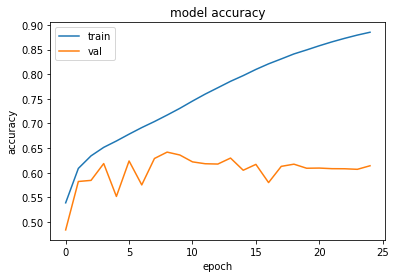

In [72]:
# model accuracy
plt.plot(GoogleNet.history.history['main_accuracy'])
plt.plot(GoogleNet.history.history['val_main_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'],loc = 'upper left')
plt.show()

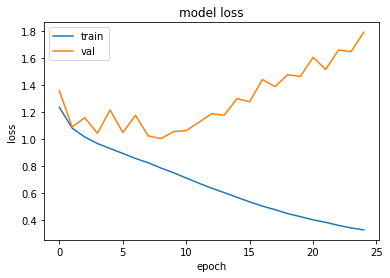

In [73]:
# model loss
plt.plot(GoogleNet.history.history['main_loss'])
plt.plot(GoogleNet.history.history['val_aux1_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'],loc = 'upper left')
plt.show()

In [74]:
GoogleNet.evaluate(x_test, y_test)

1478/1478 [==============================] - 18s 12ms/step - loss: 5.1309 - main_loss: 1.6635 - aux1_loss: 1.7828 - aux2_loss: 1.6846 - main_accuracy: 0.6157 - aux1_accuracy: 0.6168 - aux2_accuracy: 0.6156


[5.130940914154053,
 1.663480520248413,
 1.782835602760315,
 1.6846272945404053,
 0.6156514286994934,
 0.61683589220047,
 0.6156302690505981]

In [75]:
Googlenet_score = GoogleNet.evaluate(x_test, y_test)

1478/1478 [==============================] - 17s 11ms/step - loss: 5.1309 - main_loss: 1.6635 - aux1_loss: 1.7828 - aux2_loss: 1.6846 - main_accuracy: 0.6157 - aux1_accuracy: 0.6168 - aux2_accuracy: 0.6156


In [76]:
print('Test loss:', Googlenet_score[0]) 
print('Test accuracy:', Googlenet_score[4])

Test loss: 5.130940914154053
Test accuracy: 0.6156514286994934
